<a href="https://colab.research.google.com/github/tawfiqam/bertLDA/blob/main/Topic2VecParenting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd drive/My\ Drive\

/content/drive/My Drive


In [5]:
!ls

'2017 Ammari, Tawfiq'
 2018-2019
'2018 Ammari, Tawfiq'
'210 Fall'
'Ammari, Tawfiq'
 Bert+Topic2Vec
'Colab Notebooks'
'Consent Form.gsite'
'Copy of Follow The Crowd: Blog Post Signups.gform'
'Copy of In-Class Usability Test #1: Slack, Sect. 2.gform'
'Copy of #Parenting Talk by Jenny Radesky on February 5 @ 2 pm.gform'
'CSCW Writing Group Drafts'
'Cultural Differences in Parenting Boards'
'DEC Minutes 2015-2016'
'EdTech LA Group Materials '
'Foster care'
 Foster_Data_Analysis
 Google_Voice_Study_Public
'HI-RIG Open Folder'
'HRP-503b - TEMPLATE - Non-Interventional Research Protocol Template 11.1....docx'
'ICTD Discuss'
'Info for LearnEdFam 2020 ACs'
'In-person courses'
 James_Collab
'Learning Sciences Reading Group Winter 2020'
 Mentorship
'Michigan ICTD'
 Move
 MTOP
'One-on-one conversation guides for RCRS'
'#Parenting'
'Parenting Research Group '
'Parents Disabilities'
 Platform_DEC_2016
'Pre-Candidacy Paper Proposals'
 Professionals
 Research
'SI622_Course Coordination_W17'
'SI 622 UM

In [6]:
%cd Bert+Topic2Vec/

/content/drive/My Drive/Bert+Topic2Vec


In [7]:
!ls

 archive_parenting.zip		      Parenting_comments_08_15.json
 BERT.ipynb			      Parenting_comments_2016.json
'Copy of Topic2Vec.ipynb'	      Parenting_comments_2017.json
 Daddit_comments.json		      Parenting_comments_2018.json
 dadjokes_comments_2020.json	      Parenting_comments_2019.json
 Foster_Reddit_Exploring.ipynb	      Parenting_comments_2020.json
 happycryingdads_comments_2020.json   predaddit_comments_2020.json
 logfile2.log			      Top2Vec_Test_Reduce.ipynb
 logfile2.log.gdoc		      Topic2Vec.ipynb
 Mommit_comments.json


In [ ]:
#unzipping data
import zipfile
with zipfile.ZipFile('archive_parenting.zip', 'r') as zip_ref:
    zip_ref.extractall()

In [9]:
#moving logging to a file
import logging
import logging.handlers
log = logging.getLogger(__name__)
log.addHandler(logging.StreamHandler())  # Prints to console.
log.addHandler(logging.handlers.RotatingFileHandler('logfile2.log'))
log.setLevel(logging.INFO)  # Set logging level here.

In [10]:
!pip install ipython-autotime

In [11]:
%load_ext autotime

time: 83.9 µs


In [12]:
!pip install top2vec

     |████████████████████████████████| 4.7MB 5.3MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 2.6MB 49.9MB/s 
     |████████████████████████████████| 71kB 10.7MB/s 
     |████████████████████████████████| 1.1MB 52.3MB/s 
     |████████████████████████████████| 1.1MB 47.7MB/s 
     |████████████████████████████████| 890kB 49.4MB/s 
     |████████████████████████████████| 3.0MB 52.4MB/s 
     |████████████████████████████████| 1.1MB 49.4MB/s 
  Created wheel for hdbscan: filename=hdbscan-0.8.26-cp36-cp36m-linux_x86_64.whl size=2301808 sha256=4a793c7d9cd62aa4b757ddab41c9647243bfe8fe89160cc8471e01087562cb34
  Stored in directory: /root/.cache/pip/wheels/82/38/41/372f034d8abd271ef7787a681e0a47fc05d472683a7eb088ed
Successfully built hdbscan
  Created wheel for sentence-transformers: filename=sentence_transformers-0.3.8-cp36-none-any.whl size=101996 sha256=8778f268b46

In [13]:
! pip install numba conda update numba

     |████████████████████████████████| 307kB 4.5MB/s 
     |████████████████████████████████| 71kB 7.1MB/s 
     |████████████████████████████████| 112kB 16.9MB/s 
     |████████████████████████████████| 552kB 11.9MB/s 
  Created wheel for conda: filename=conda-4.3.16-cp36-none-any.whl size=336938 sha256=cac01dc58136feaa0dabd767e23fff1747ccf6d1db532b36645c63362419ac93
  Stored in directory: /root/.cache/pip/wheels/a3/50/79/302742d53e2231ec545cb3791abfdd24de234021ed8e0588a0
  Created wheel for pycosat: filename=pycosat-0.6.3-cp36-cp36m-linux_x86_64.whl size=142846 sha256=f4aec571bbe0ad457911465b7c72ecc0ce5e79615719973dd1c7826c4e9c1f1a
  Stored in directory: /root/.cache/pip/wheels/c4/67/ff/5570304e45814eccef48a3c69c3af25d0456ed3a34eddbbe38
Successfully built conda pycosat
time: 8.78 s


In [14]:
from top2vec import Top2Vec
import pandas as pd
pd.options.display.max_columns = None
pd.options.display.max_rows = 1000
pd.set_option('display.max_colwidth', -1)

time: 8.69 s


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """


In [16]:
df = pd.read_json('Parenting_comments_08_15.json')

time: 33.6 s


In [17]:
len(df.id)

1129230

time: 11 ms


In [18]:
len(df.id.unique())

1129230

time: 233 ms


In [ ]:
#there are no duplicates
duplicateRowsDF = df[df.duplicated(['id'])]
len(duplicateRowsDF)
df = df.drop_duplicates(subset=['id'])

In [19]:
df.created_utc = pd.to_datetime(df.created_utc,unit='s')
df = df.set_index('created_utc')

time: 279 ms


In [20]:
docs = df.body.values

time: 939 µs


In [ ]:
model = Top2Vec(documents=docs, speed="learn", workers=20, verbose=True, min_count=50, keep_documents=True, document_ids=df.id)

2020-10-20 01:26:25,488 - top2vec - INFO - Pre-processing documents for training
2020-10-20 01:29:04,839 - top2vec - INFO - Creating joint document/word embedding
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-21-828849483396>", line 1, in <module>
    model = Top2Vec(documents=docs, speed="learn", workers=20, verbose=True, min_count=50, keep_documents=True, document_ids=df.id)
  File "/usr/local/lib/python3.6/dist-packages/top2vec/Top2Vec.py", line 271, in __init__
    self.model = Doc2Vec(**doc2vec_args)
  File "/usr/local/lib/python3.6/dist-packages/gensim/models/doc2vec.py", line 615, in __init__
    end_alpha=self.min_alpha, callbacks=callbacks)
  File "/usr/local/lib/python3.6/dist-packages/gensim/models/doc2vec.py", line 795, in train
    queue_factor=queue_factor, report_delay=report_delay, callbacks=callbacks, **kwargs)
  File "/usr/local/lib/python3.6/dist-packages/gensim/models/base_any2vec.py", line 1081, in train
    **kwargs)
  File "/usr/local/lib/python3.6/dist-p

KeyboardInterrupt: ignored

time: 1h 54min 31s


ERROR:tornado.general:Uncaught exception in ZMQStream callback
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/zmq/eventloop/zmqstream.py", line 444, in _run_callback
    callback(*args, **kwargs)
  File "/usr/local/lib/python3.6/dist-packages/tornado/stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel/kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel/kernelbase.py", line 421, in execute_request
    self._abort_queues()
  File "/usr/local/lib/python3.6/dist-packages/ipykernel/kernelbase.py", line 636, in _abort_queues
    self._abort_queue(stream)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel/kernelbase.py", line 657, in _abort_queue
    sel

In [ ]:
model.save('Foster_130_Oct_19.model')

In [ ]:
model_loaded = Top2Vec.load("foster_130_Oct_19.model")

FileNotFoundError: ignored

In [ ]:
model.get_num_topics()

153

In [ ]:
topic_sizes, topic_nums = model.get_topic_sizes()

In [ ]:
topic_nums

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152])

In [ ]:
topic_sizes

array([342, 264, 246, 242, 216, 207, 205, 195, 186, 157, 156, 154, 146,
       145, 142, 141, 136, 126, 125, 124, 117, 114, 111, 111, 109, 105,
       103, 102, 100,  99,  99,  97,  94,  94,  94,  93,  90,  88,  84,
        82,  82,  81,  81,  80,  79,  78,  78,  77,  77,  77,  76,  76,
        76,  74,  74,  73,  72,  71,  70,  70,  70,  70,  69,  68,  68,
        68,  67,  66,  66,  65,  64,  63,  63,  62,  62,  62,  62,  61,
        61,  61,  60,  60,  60,  60,  60,  59,  59,  58,  57,  57,  57,
        56,  56,  55,  55,  55,  55,  54,  54,  53,  53,  53,  52,  52,
        52,  51,  50,  49,  49,  49,  49,  48,  48,  48,  48,  48,  47,
        47,  46,  46,  46,  45,  45,  45,  44,  44,  44,  43,  43,  43,
        43,  43,  42,  40,  40,  40,  39,  38,  37,  36,  36,  35,  34,
        33,  33,  32,  31,  31,  30,  30,  27,  26,  26])

In [ ]:
sum(topic_sizes)

11830

In [ ]:
list_of_topic_df = []
i = 0
for topic in topic_nums:
  documents, doc_scores, doc_id = model.search_documents_by_topic(topic,topic_sizes[i],return_documents=True,reduced=False)
  topic_dataframe = pd.DataFrame({'id':doc_id,'score'+str(topic):doc_scores})
  list_of_topic_df.append(topic_dataframe)
  i+=1

In [ ]:
list_of_topic_df[0]

,id,score0
0,fioqcr9,0.850178
1,fhnm5hn,0.819400
2,fjc537q,0.801882
3,fcuzrq8,0.782572
4,fo17ba3,0.778075
5,fquq1sa,0.771431
6,fl83xi5,0.764532
7,fg0vwl4,0.756593
8,fml18p2,0.756156
9,fph3llk,0.755786


In [ ]:
df_copy = df.copy()

In [ ]:
for df_ in list_of_topic_df:
    df_copy = pd.merge(df_copy,df_, on='id',how='outer')

In [ ]:
pd.options.display.max_columns = None

In [ ]:
df_copy = df_copy.fillna(0)

In [ ]:
df_copy[df_copy['score0']>0.7].body

67       What does the self harm usually look like? Getting hurt during panic attacks? Grand/angry displays that include injuries with weapons? Hiding smaller injuries with nails/bruising/repetitive motions?                                                                                                                                                                                                                      
298      Does she have a therapist? It sounds like the family doesn't have a lot of motivation to change their behavior so the most you can do is try to support her emotional processing.                                                                                                                                                                                                                                           
343      Follow up? I hope peace and courage for your household. Stress is a strain on compassion and forgiveness. I would know from the pain I've experienc

In [ ]:
df_copy.to_json('Tag2TopFoster.json')

In [ ]:
topic_words, word_scores, topic_nums = model.get_topics()

In [ ]:
topic_words[0]

array(['congrats', 'encouragement', 'flair', 'viewpoint', 'mod', 'mama',
       'congratulations', 'sharing', 'dating', 'exciting', 'timeline',
       'forum', 'annoyed', 'honeymoon', 'utm_name', 'insight', 'iossmf',
       'adoptuskids', 'hopeful', 'infertility', 'savior', 'ref',
       'ex_foster', 'fc', 'cross', 'fosterparents', 'thank',
       'constructive', 'joy', 'podcast', 'expressed', 'subs',
       'suggesting', 'apologize', 'racist', 'glad', 'subreddit', 'daddy',
       'problematic', 'ios_app', 'mommy', 'reached', 'racism', 'channel',
       'introduce', 'male', 'privately', 'wise', 'rude', 'listening'],
      dtype='<U15')

In [ ]:
reduced = model.hierarchical_topic_reduction(num_topics=15)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [ ]:
reduced

[[42,
  76,
  117,
  146,
  105,
  38,
  96,
  138,
  39,
  53,
  50,
  115,
  26,
  109,
  151,
  17,
  77,
  122,
  137,
  131,
  56,
  25,
  130,
  21,
  145,
  29,
  112,
  116,
  43,
  58,
  123,
  79,
  47,
  27,
  28,
  139,
  45,
  127,
  46,
  124,
  106,
  114,
  66,
  65,
  144,
  51,
  64,
  63,
  54,
  72,
  68,
  61,
  67,
  82,
  84,
  71,
  73,
  98,
  104,
  94,
  108,
  102,
  119,
  101,
  125,
  129,
  136,
  148,
  8],
 [31, 60, 70, 91, 1],
 [85, 59, 16, 4, 36, 107, 3],
 [30, 120, 37, 89, 133, 20, 44, 81, 55, 143, 14],
 [10, 15, 152, 24, 41, 103, 121, 6],
 [128, 5, 92, 2],
 [48, 19, 23, 147, 40, 134, 18],
 [34, 150, 57, 69, 80, 99, 111, 118, 83],
 [32, 74, 87, 149, 135, 142, 7],
 [132, 0],
 [110, 33, 113, 90, 75, 13],
 [78, 52, 126, 22],
 [93, 141, 9, 35, 95, 62],
 [97, 86, 100, 88, 49],
 [12, 140, 11]]

In [ ]:
with open('topics.txt', 'w') as f:
    for item in topic_words:
        f.write("%s\n" % item)

In [ ]:
words, scores, topic_nums = model.get_topics()

In [ ]:
documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=52, num_docs=5)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(df[df['id']==doc_id].body)
    print("-----------")
    print()

Document: fir4k6r, Score: 0.8462858200073242
-----------
4458    Did you punish it out of them?
Name: body, dtype: object
-----------

Document: fpseiyq, Score: 0.760347843170166
-----------
814    Oof, all that anxiety and she didn’t answer the call. Foster care is hard. 😞
Name: body, dtype: object
-----------

Document: fjgf7d9, Score: 0.7545475959777832
-----------
9868    I’m mostly concerned with the anger and anxiety.
Name: body, dtype: object
-----------

Document: ffs4zs3, Score: 0.7301064729690552
-----------
10724    I'm just so worried about everything and we're doing okay but this is giving us such anxiety.
Name: body, dtype: object
-----------

Document: firbn2h, Score: 0.7034645080566406
-----------
4456    It's not a fight, it's an honest question\n\nDoes one just punish a kid til they stop?
Name: body, dtype: object
-----------



In [ ]:
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["covid"], num_topics=5)

In [ ]:
topic_nums

array([67, 27,  0, 81, 87])

In [ ]:
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["covid"], num_topics=5)
for topic in topic_nums:
    model.generate_topic_wordcloud(topic)

In [ ]:
words, word_scores = model.similar_words(keywords=["covid"], keywords_neg=[], num_words=20)
for word, score in zip(words, word_scores):
    print(f"{word} {score}")

postponed 0.3843
flu 0.3843
infection 0.3832
precautions 0.3802
risk 0.3767
virus 0.3636
elevated 0.3256
pandemic 0.3249
protocols 0.324
symptoms 0.3222
due 0.2906
now 0.2859
quarantine 0.2742
ear 0.2633
distancing 0.2615
subsidy 0.2591
confirmed 0.2589
essential 0.2553
virtual 0.2538
isolation 0.2525


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [ ]:
topic_scores

array([0.4767, 0.2869, 0.2301, 0.2278, 0.2236])

In [ ]:
model.get_topic_sizes(reduced=False)

(array([337, 320, 286, 271, 269, 267, 266, 244, 236, 199, 191, 181, 177,
        170, 170, 160, 147, 144, 139, 135, 134, 131, 121, 120, 117, 114,
        113, 111, 108, 105, 104, 103, 101, 101,  97,  97,  97,  96,  95,
         95,  94,  93,  93,  91,  91,  88,  88,  84,  84,  83,  82,  82,
         82,  80,  79,  77,  77,  76,  76,  75,  73,  73,  72,  71,  71,
         69,  68,  68,  68,  68,  67,  66,  65,  64,  63,  62,  61,  61,
         60,  60,  59,  59,  59,  58,  57,  57,  57,  56,  56,  55,  55,
         55,  55,  54,  54,  54,  53,  52,  51,  50,  49,  49,  49,  49,
         48,  48,  48,  48,  47,  47,  45,  44,  44,  42,  41,  41,  40,
         40,  39,  39,  39,  39,  38,  37,  36,  35,  34,  33,  31,  31]),
 array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  

In [ ]:
import numpy as np 
import pandas as pd 
import json
import os
import ipywidgets as widgets
from IPython.display import clear_output, display
from top2vec import Top2Vec

Label(value='Enter keywords seperated by space: ')

Text(value='covid')

Label(value='Enter negative keywords seperated by space: ')

Text(value='')

Label(value='Choose number of topics: ')

Text(value='5')

Button(description='show topics', style=ButtonStyle())

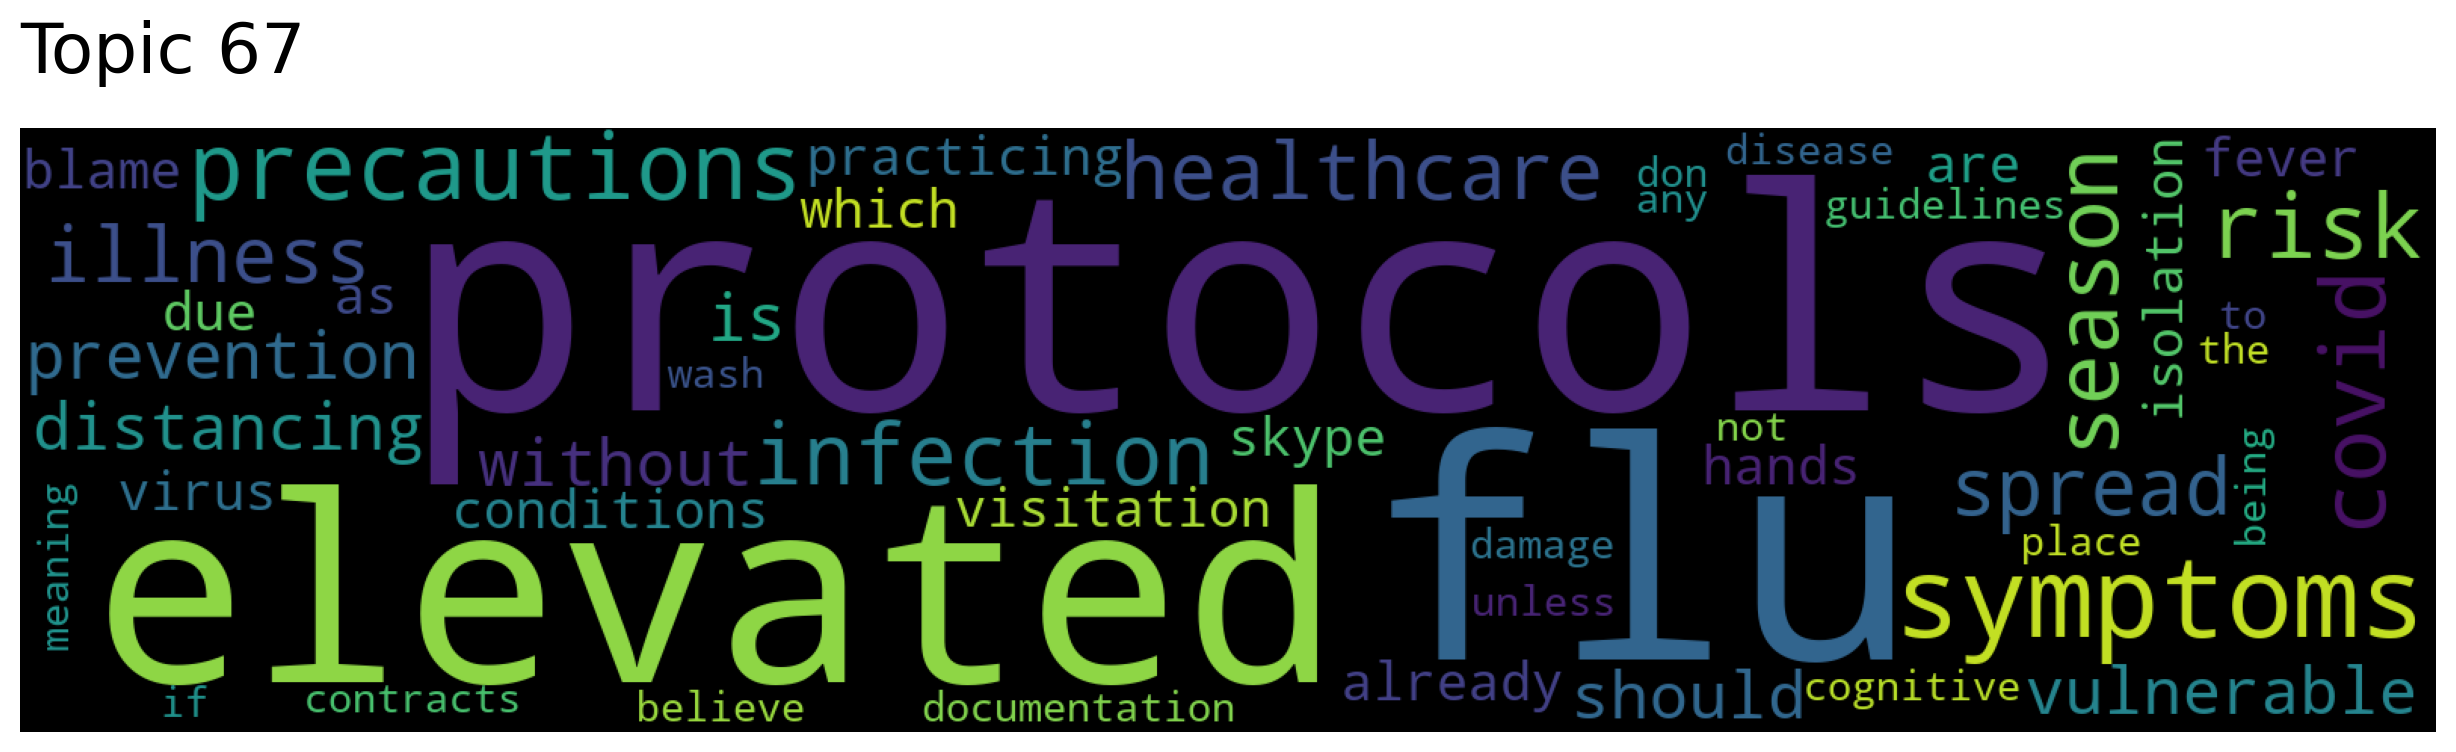

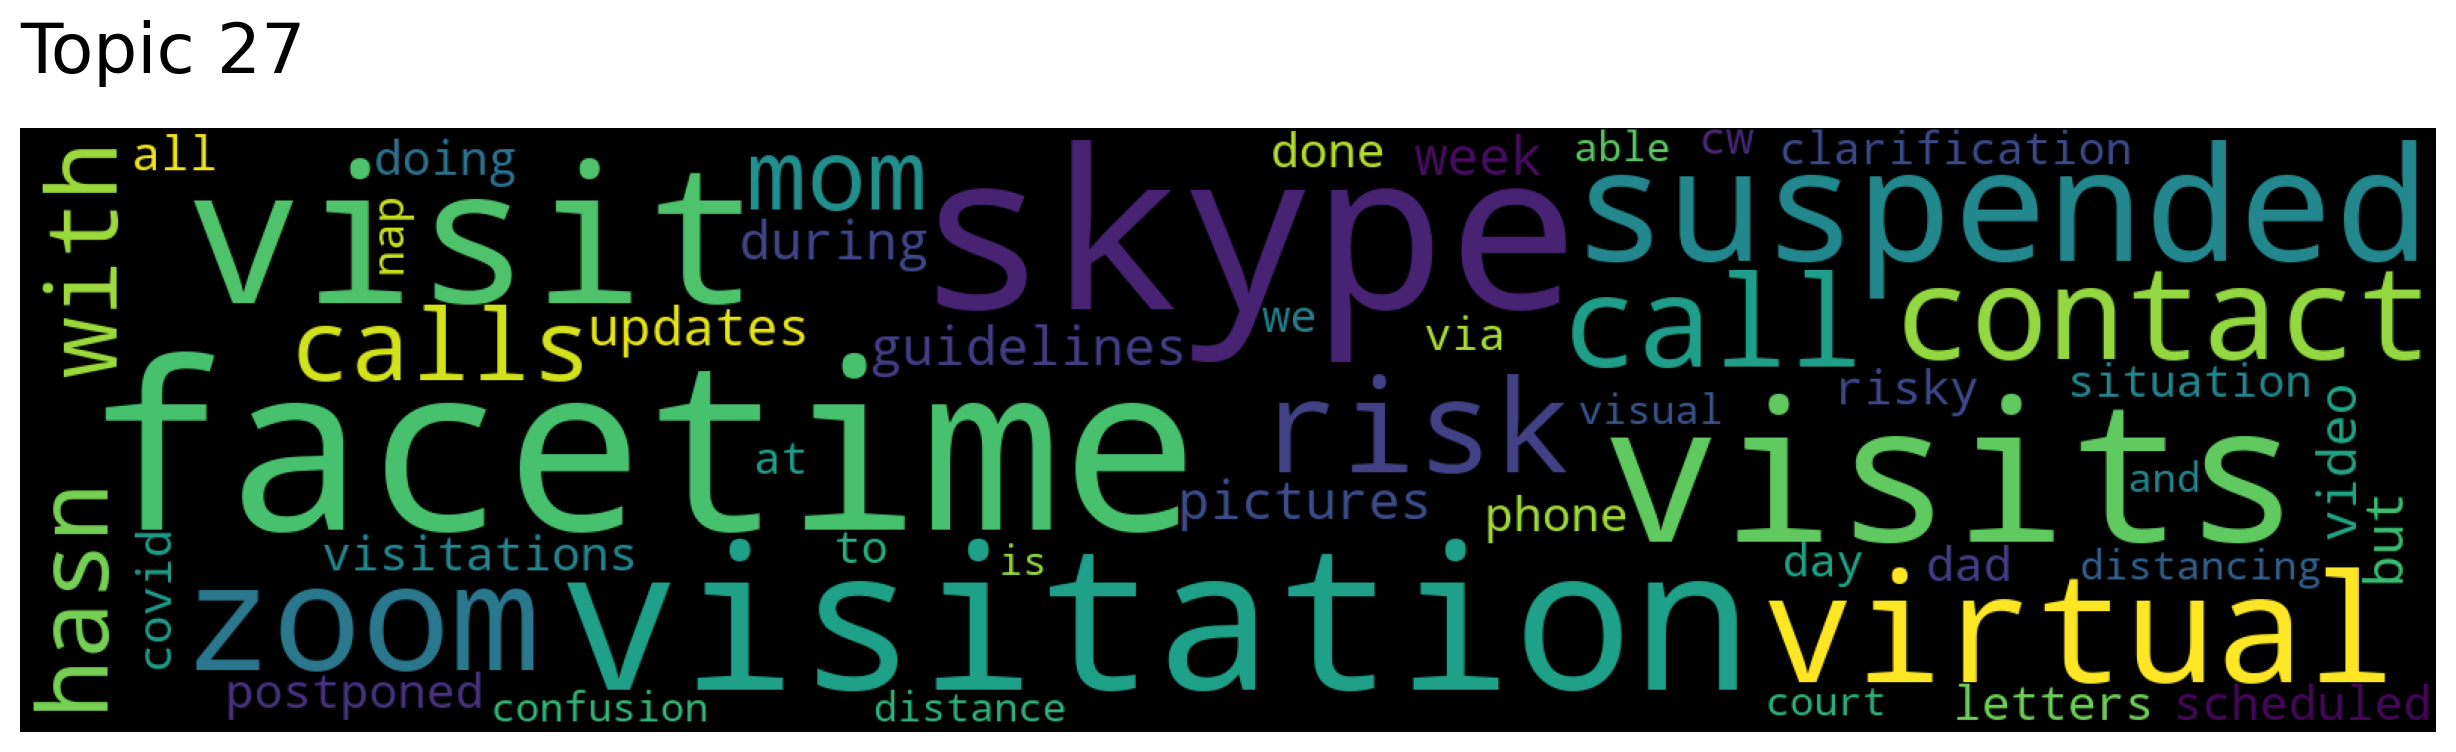

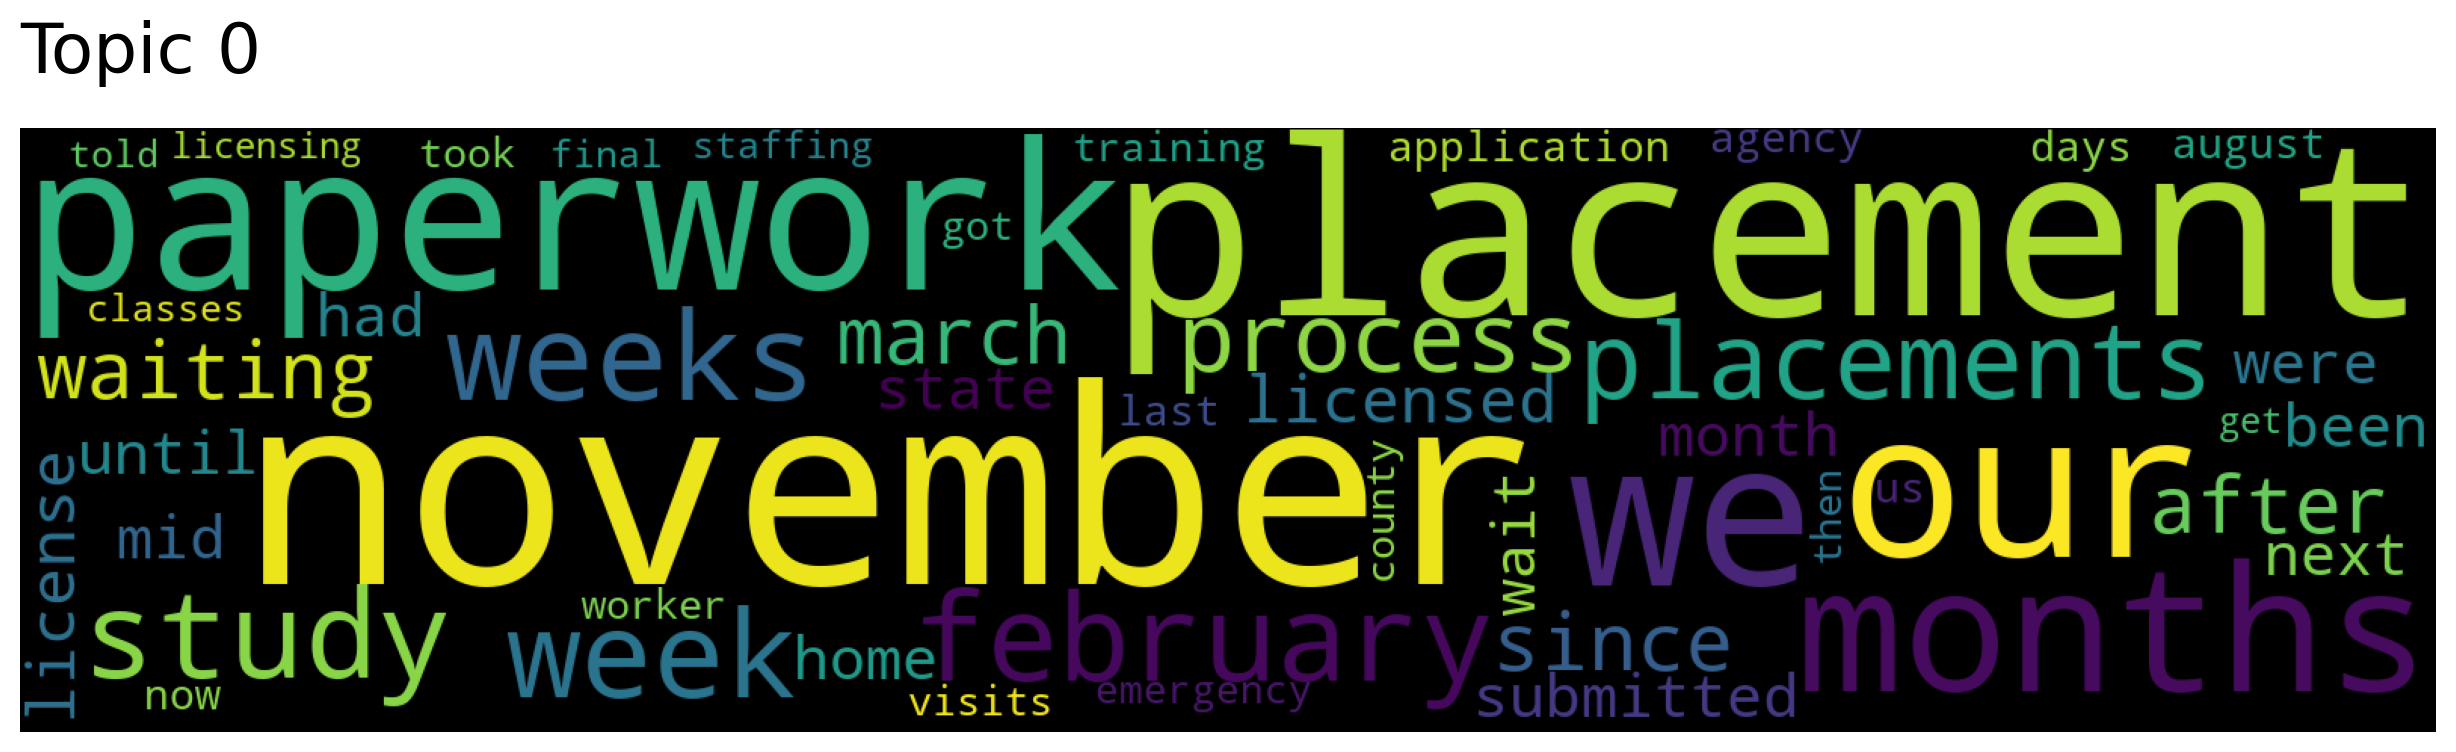

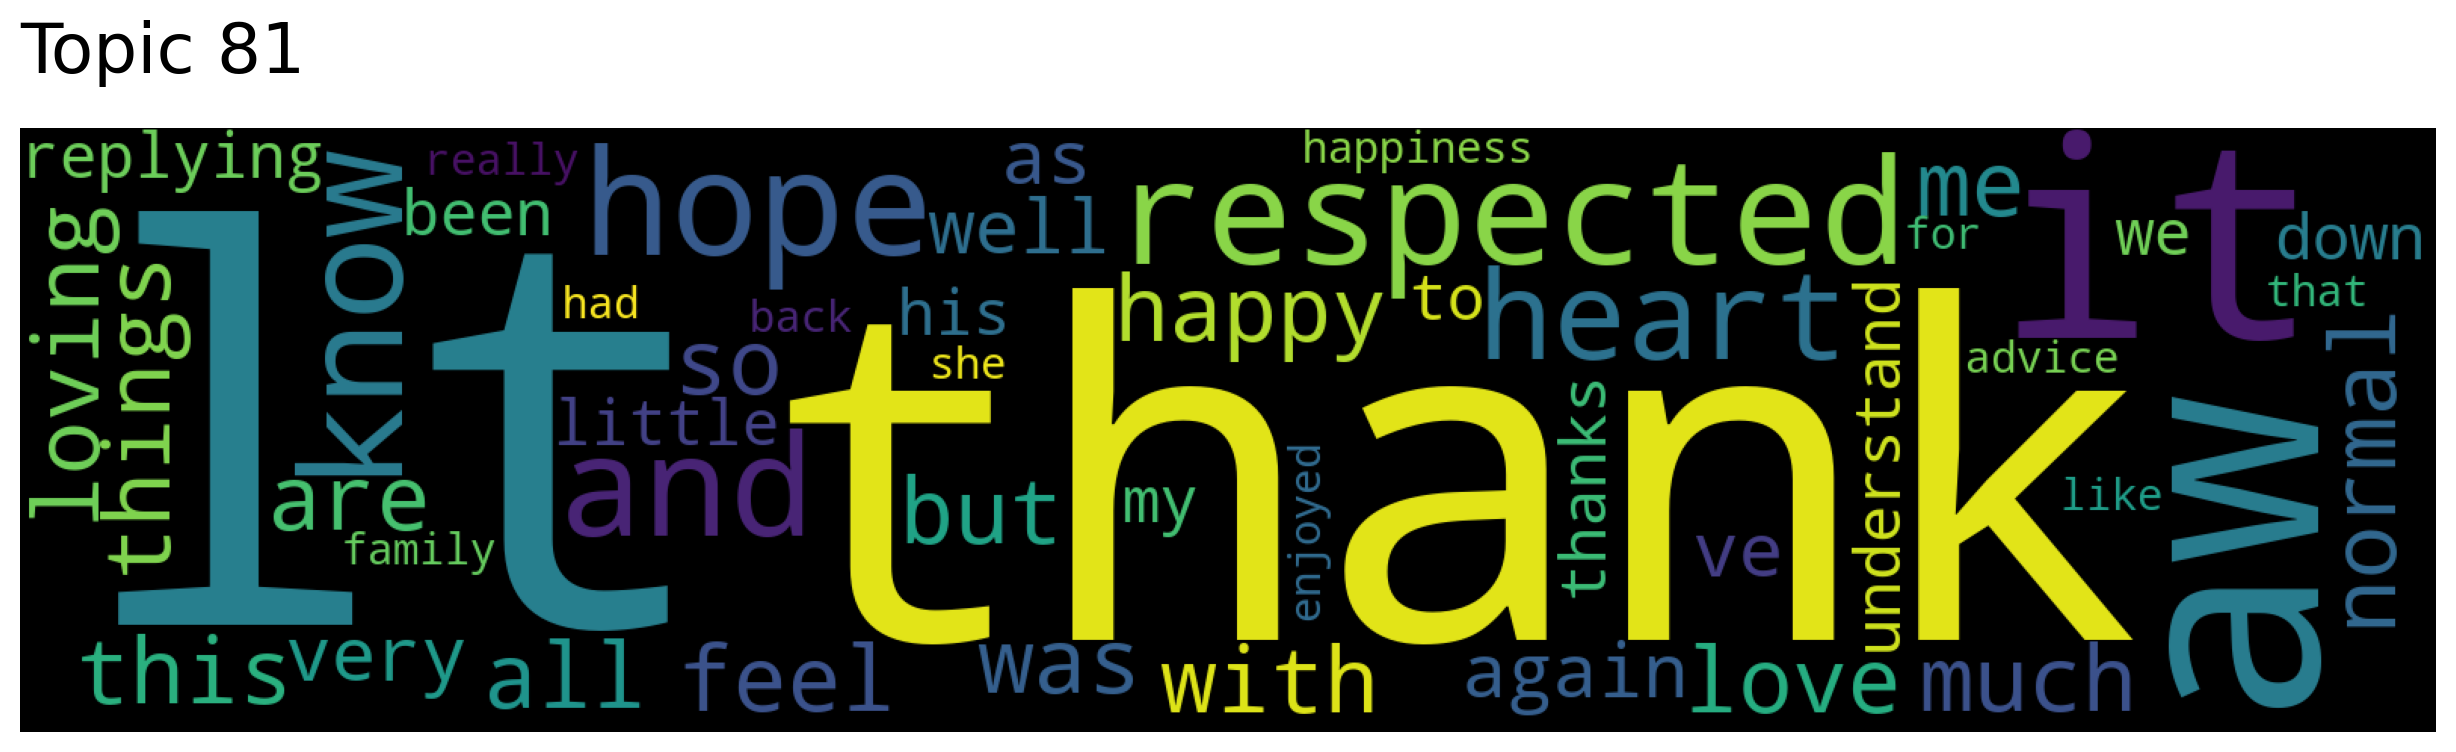

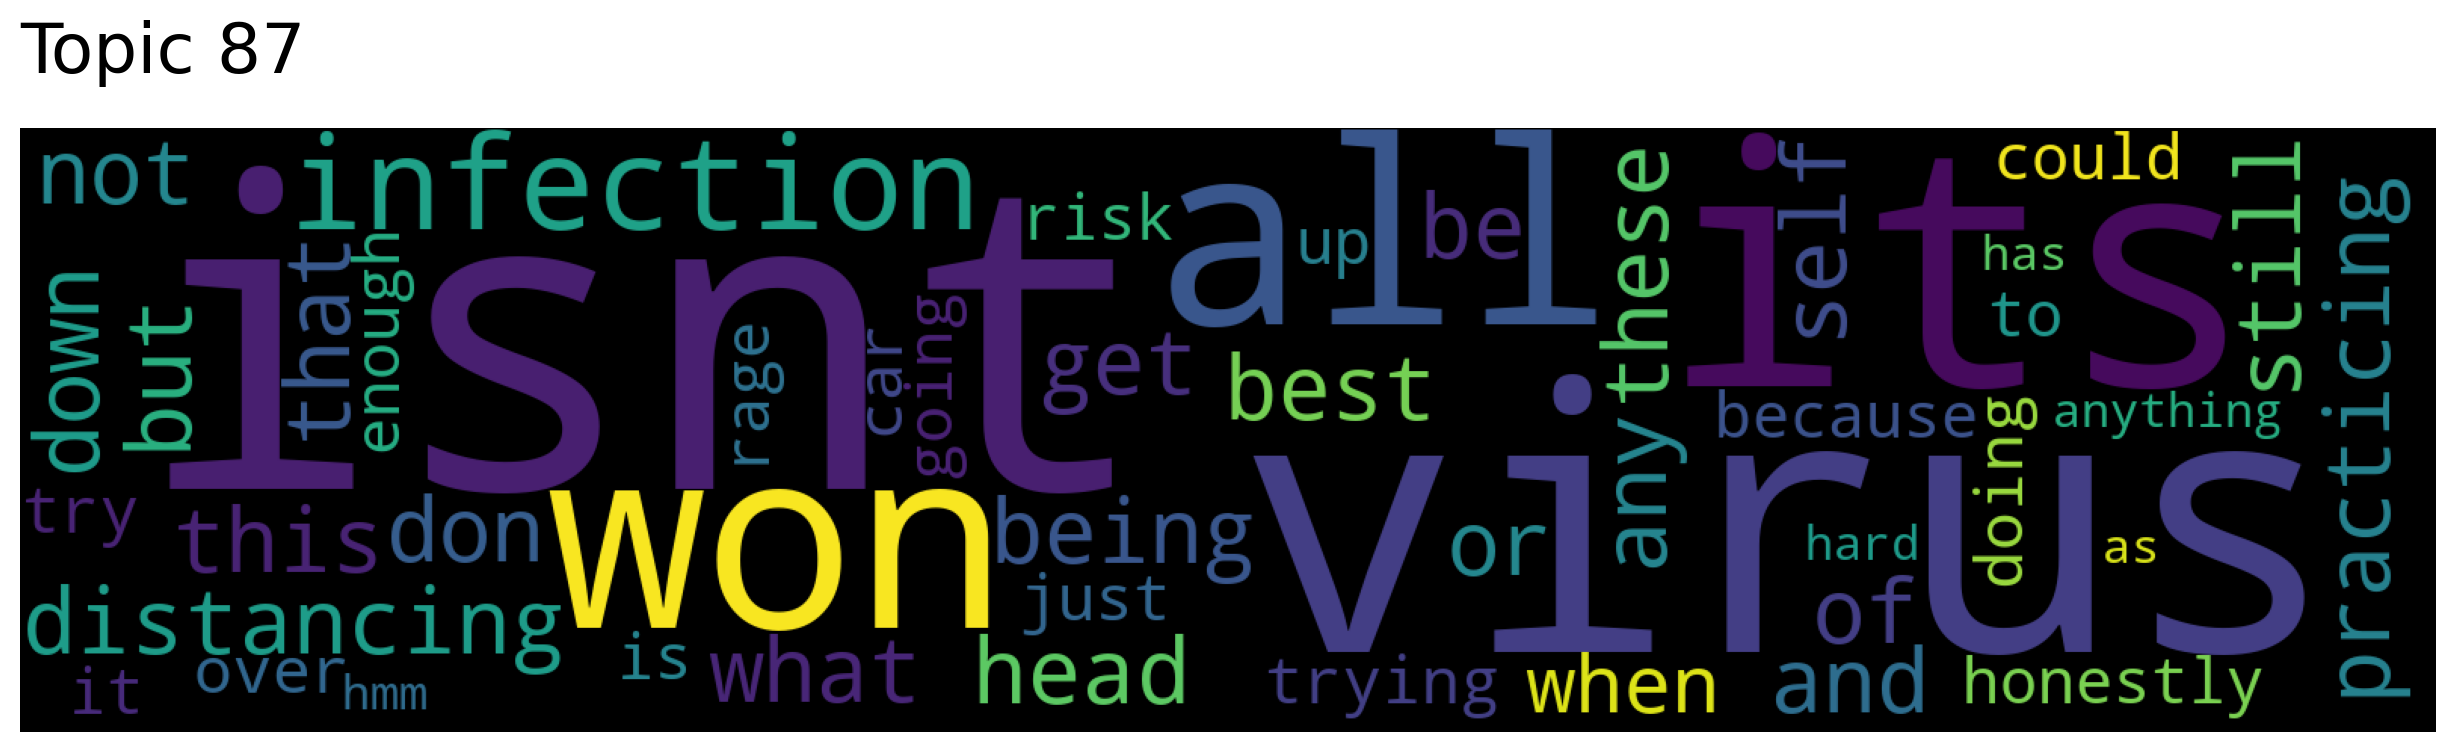

In [ ]:
keywords_select_st = widgets.Label('Enter keywords seperated by space: ')
display(keywords_select_st)

keywords_input_st = widgets.Text()
display(keywords_input_st)

keywords_neg_select_st = widgets.Label('Enter negative keywords seperated by space: ')
display(keywords_neg_select_st)

keywords_neg_input_st = widgets.Text()
display(keywords_neg_input_st)

doc_num_select_st = widgets.Label('Choose number of topics: ')
display(doc_num_select_st)

doc_num_input_st = widgets.Text(value='5')
display(doc_num_input_st)

def display_similar_topics(*args):
    
    clear_output()
    display(keywords_select_st)
    display(keywords_input_st)
    display(keywords_neg_select_st)
    display(keywords_neg_input_st)
    display(doc_num_select_st)
    display(doc_num_input_st)
    display(keyword_btn_st)
    
    try:
        topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=keywords_input_st.value.split(),num_topics=int(doc_num_input_st.value), keywords_neg=keywords_neg_input_st.value.split())
        for topic in topic_nums:
            model.generate_topic_wordcloud(topic, background_color="black")
        
    except Exception as e:
        print(e)
        
keyword_btn_st = widgets.Button(description="show topics")
display(keyword_btn_st)
keyword_btn_st.on_click(display_similar_topics)



In [ ]:
df_copy.created_utc = pd.to_datetime(df_copy.created_utc,unit='s')
g = df_copy.groupby(['author','created_utc'])['score0','score1']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


In [ ]:
df_sample = df_copy.iloc[200:220]
#df_sample = df_sample.set_index('created_utc')

In [ ]:
g = df_sample.groupby(['author','created_utc'])['score0','score1']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [ ]:
g.head()

,score0,score1
200,0.000000,0.0
201,0.583689,0.0
202,0.000000,0.0
203,0.000000,0.0
204,0.000000,0.0
205,0.000000,0.0
206,0.000000,0.0
207,0.000000,0.0
208,0.000000,0.0
209,0.000000,0.0


In [ ]:
type(g)

pandas.core.groupby.generic.DataFrameGroupBy

In [ ]:
print(g.first())

                                            score0  score1
author               created_utc                          
KickinAssHaulinGrass 2020-05-19 09:55:17  0.000000  0.0   
americagenerica      2020-05-19 17:14:55  0.000000  0.0   
circa285             2020-05-19 13:50:40  0.000000  0.0   
                     2020-05-19 14:47:44  0.000000  0.0   
crxdc0113            2020-05-19 11:47:38  0.000000  0.0   
dopavash             2020-05-19 17:12:04  0.000000  0.0   
elko825              2020-05-19 13:17:39  0.000000  0.0   
                     2020-05-19 13:26:54  0.000000  0.0   
geoff5093            2020-05-19 13:00:46  0.000000  0.0   
                     2020-05-19 17:59:50  0.583689  0.0   
                     2020-05-19 18:00:42  0.000000  0.0   
girlabout2fallasleep 2020-05-19 11:20:36  0.000000  0.0   
                     2020-05-19 15:16:20  0.000000  0.0   
goodfeelingaboutit   2020-05-19 14:02:52  0.000000  0.0   
ilmwa                2020-05-19 08:08:35  0.000000  0.0 

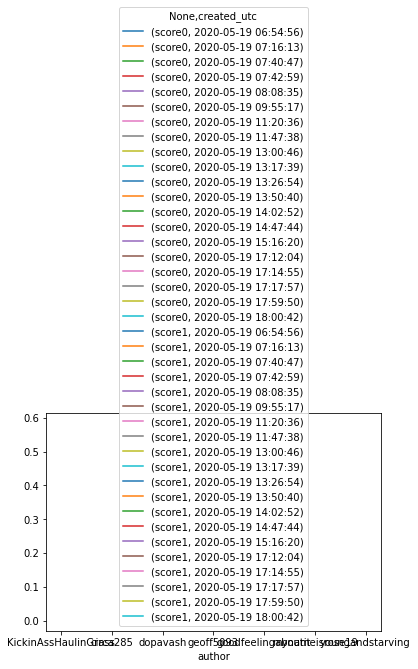

In [ ]:
g.mean().unstack().plot()

In [ ]:
g.mean().unstack()

score0                      \
created_utc          2020-05-19 06:54:56 2020-05-19 07:16:13   
author                                                         
KickinAssHaulinGrass NaN                 NaN                   
americagenerica      NaN                 NaN                   
circa285             NaN                 NaN                   
crxdc0113            NaN                 NaN                   
dopavash             NaN                 NaN                   
elko825              NaN                 NaN                   
geoff5093            NaN                 NaN                   
girlabout2fallasleep NaN                 NaN                   
goodfeelingaboutit   NaN                 NaN                   
ilmwa                NaN                 NaN                   
mynameisrose19       NaN                  0.0                  
victoria805          NaN                 NaN                   
youngandstarving      0.0                NaN                   

                                                              \
created_utc          2020-05-19 07:40:47 2020-05-19 07:42:59   
author                                                         
KickinAssHaulinGrass NaN                 NaN                   
americagenerica      NaN                 NaN                   
circa285             NaN                 NaN                   
crxdc0113            NaN                 NaN                   
dopavash             NaN                 NaN                   
elko825              NaN                 NaN                   
geoff5093            NaN                 NaN                   
girlabout2fallasleep NaN                 NaN                   
goodfeelingaboutit   NaN                 NaN                   
ilmwa                NaN                 NaN                   
mynameisrose19       NaN                  0.0                  
victoria805          NaN                 NaN                   
youngandstarving      0.0                NaN                   

                                                              \
created_utc          2020-05-19 08:08:35 2020-05-19 09:55:17   
author                                                         
KickinAssHaulinGrass NaN                  0.0                  
americagenerica      NaN                 NaN                   
circa285             NaN                 NaN                   
crxdc0113            NaN                 NaN                   
dopavash             NaN                 NaN                   
elko825              NaN                 NaN                   
geoff5093            NaN                 NaN                   
girlabout2fallasleep NaN                 NaN                   
goodfeelingaboutit   NaN                 NaN                   
ilmwa                 0.0                NaN                   
mynameisrose19       NaN                 NaN                   
victoria805          NaN                 NaN                   
youngandstarving     NaN                 NaN                   

                                                              \
created_utc          2020-05-19 11:20:36 2020-05-19 11:47:38   
author                                                         
KickinAssHaulinGrass NaN                 NaN                   
americagenerica      NaN                 NaN                   
circa285             NaN                 NaN                   
crxdc0113            NaN                  0.0                  
dopavash             NaN                 NaN                   
elko825              NaN                 NaN                   
geoff5093            NaN                 NaN                   
girlabout2fallasleep  0.0                NaN                   
goodfeelingaboutit   NaN                 NaN                   
ilmwa                NaN                 NaN                   
mynameisrose19       NaN                 NaN                   
victoria805          NaN                 NaN                   

In [ ]:
def plot_gb_time_series(df, ts_name, gb_name, value_name, figsize=(20,7), title=None):
    '''
    Runs groupby on Pandas dataframe and produces a time series chart.

    Parameters:
    ----------
    df : Pandas dataframe
    ts_name : string
        The name of the df column that has the datetime timestamp x-axis values.
    gb_name : string
        The name of the df column to perform group-by.
    value_name : string
        The name of the df column for the y-axis.
    figsize : tuple of two integers
        Figure size of the resulting plot, e.g. (20, 7)
    title : string
        Optional title
    '''
    xtick_locator = DayLocator(interval=1)
    xtick_dateformatter = DateFormatter('%m/%d/%Y')
    fig, ax = plt.subplots(figsize=figsize)
    for key, grp in df.groupby([gb_name]):
      ax = grp.plot(ax=ax, kind='line', x=ts_name, y=value_name, label=key, marker='o')
        
    ax.xaxis.set_major_locator(xtick_locator)
    ax.xaxis.set_major_formatter(xtick_dateformatter)
    ax.autoscale_view()
    ax.legend(loc='upper left')
    _ = plt.xticks(rotation=90, )
    _ = plt.grid()
    _ = plt.xlabel('')
    _ = plt.ylim(0, df[value_name].max() * 1.25)
    _ = plt.ylabel(value_name)
    if title is not None:
        _ = plt.title(title)
    _ = plt.show()


In [ ]:
df_sample = df_sample.reset_index()
plot_gb_time_series(df_sample, created_utc, author, score0, figsize=(20,7), title=None)

NameError: ignored

In [ ]:
df_sample.columns

Index(['created_utc', 'index', 'all_awardings', 'associated_award', 'author',
       'author_flair_background_color', 'author_flair_css_class',
       'author_flair_richtext', 'author_flair_template_id',
       'author_flair_text',
       ...
       'score134', 'score135', 'score136', 'score137', 'score138', 'score139',
       'score140', 'score141', 'score142', 'score143'],
      dtype='object', length=200)

In [ ]:
df = generate_random_data()

plot_gb_time_series(df, 'my_timestamp', 'my_series', 'my_value',
                    figsize=(10, 5), title="Random data")

NameError: ignored

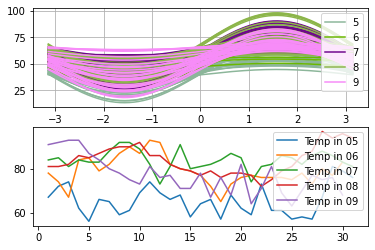

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pylab as plt
from pandas.plotting import andrews_curves

data = sm.datasets.get_rdataset('airquality').data
fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1)
data = data[data.columns.tolist()[3:]] # use only Temp, Month, Day

# Andrews' curves
andrews_curves(data, 'Month', ax=ax1)

# multiline plot with group by
for key, grp in data.groupby(['Month']): 
    ax2.plot(grp['Day'], grp['Temp'], label = "Temp in {0:02d}".format(key))
plt.legend(loc='best')    
plt.show()

In [ ]:
df_sample = df_copy[100:300]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

KeyError: ignored

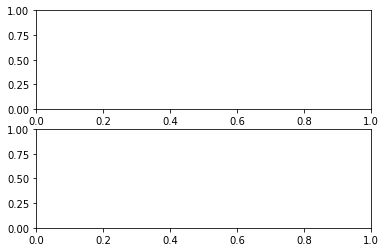

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pylab as plt
from pandas.plotting import andrews_curves

df_sample['year'] = df_sample.created_utc.dt.year
df_sample['month'] = df_sample.created_utc.dt.month
df_sample['day'] = df_sample.created_utc.dt.day

#data = g.mean().unstack()
data = df_sample.groupby(['author','month'])['score0'].mean().unstack()
fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1)
#data = data[data.columns.tolist()[3:]] # use only Temp, Month, Day

# Andrews' curves
andrews_curves(data, '5', ax=ax1)

# multiline plot with group by
for key, grp in data.groupby(['Month']): 
    ax2.plot(grp['Day'], grp['Temp'], label = "Temp in {0:02d}".format(key))
plt.legend(loc='best')    
plt.show()

In [ ]:
data

month,5
author,
KickinAssHaulinGrass,0.000000
americagenerica,0.000000
circa285,0.000000
crxdc0113,0.000000
dopavash,0.000000
elko825,0.000000
geoff5093,0.194563
girlabout2fallasleep,0.000000
goodfeelingaboutit,0.000000


In [ ]:
len(df_sample)

20

In [ ]:
df_sample = df_copy.copy()

In [ ]:
df_sample = df_sample.set_index('created_utc')

In [ ]:
g = df_sample.groupby(['author'],level=0).mean()

In [ ]:
g.mean().unstack().fillna(0).plot(subplots=False)

AttributeError: ignored

In [ ]:
type(g.mean())

pandas.core.series.Series

In [ ]:
draw = pd.DataFrame(df_sample.groupby(['author'],level=0).mean())

In [ ]:
draw.columns

Index(['index', 'associated_award', 'author_flair_css_class',
       'author_patreon_flair', 'author_premium',
       'collapsed_because_crowd_control', 'is_submitter', 'locked',
       'no_follow', 'retrieved_on', 'score', 'send_replies', 'stickied',
       'total_awards_received', 'created', 'edited', 'author_cakeday',
       'Topic0', 'Topic1', 'Topic2', 'Topic3', 'Topic4', 'Topic5', 'Topic6',
       'Topic7', 'Topic8', 'Topic9', 'Topic10', 'Topic11', 'Topic12',
       'Topic13', 'dominant_topic'],
      dtype='object')

author
AJB160816               [AxesSubplot(0.125,0.2;0.775x0.68)]
AlcatK                  [AxesSubplot(0.125,0.2;0.775x0.68)]
Alethequeen             [AxesSubplot(0.125,0.2;0.775x0.68)]
Allredditorsarewomen    [AxesSubplot(0.125,0.2;0.775x0.68)]
AquaStarRedHeart        [AxesSubplot(0.125,0.2;0.775x0.68)]
BKLYNPSYCHOTHERAPIST    [AxesSubplot(0.125,0.2;0.775x0.68)]
BlunderMeister          [AxesSubplot(0.125,0.2;0.775x0.68)]
BrisadelMar             [AxesSubplot(0.125,0.2;0.775x0.68)]
Brown_Eyes512           [AxesSubplot(0.125,0.2;0.775x0.68)]
Byoken                  [AxesSubplot(0.125,0.2;0.775x0.68)]
CrystalKirbz            [AxesSubplot(0.125,0.2;0.775x0.68)]
EatsPeanutButter        [AxesSubplot(0.125,0.2;0.775x0.68)]
FiendishCurry           [AxesSubplot(0.125,0.2;0.775x0.68)]
Frnklfrwsr              [AxesSubplot(0.125,0.2;0.775x0.68)]
Ilovedietcokesprite     [AxesSubplot(0.125,0.2;0.775x0.68)]
JAB1971                 [AxesSubplot(0.125,0.2;0.775x0.68)]
Junebugdawn             [AxesSubp

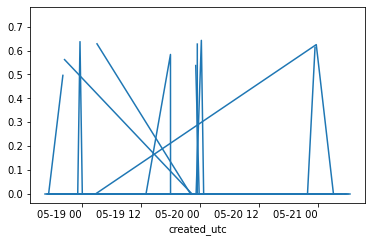

In [ ]:
g.plot(subplots=True)

TypeError: ignored

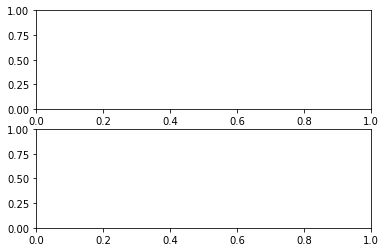

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1)

andrews_curves(draw,'score0',ax=ax1)

#for key, grp in data.groupby(['author']): 
    #ax2.plot(draw['Topic0'], label = "Temp in {0:02d}".format(key))

plt.show()

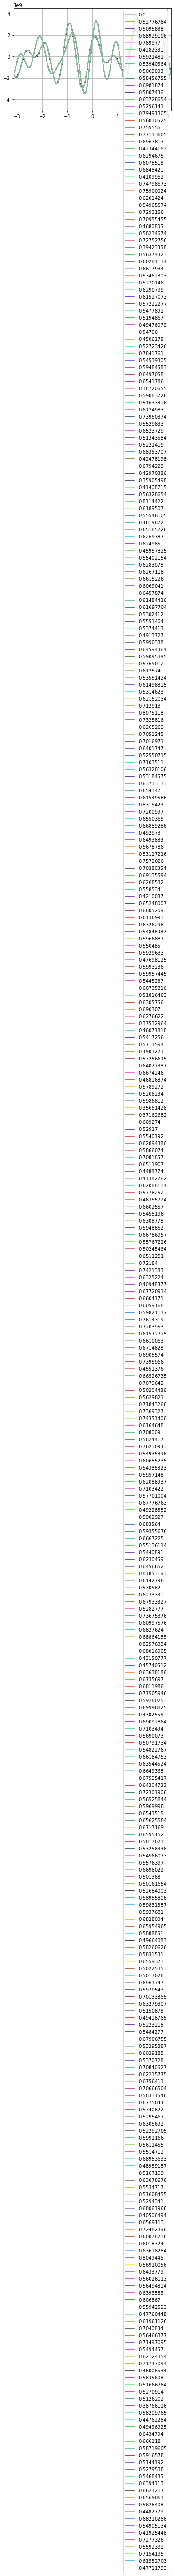

In [ ]:
x = pd.plotting.andrews_curves(draw,'score1',samples=200)  
# ploting the Curve 
x.plot(legend=False) 
  
# Display 
plt.show()
#plt.legend(False)

AttributeError: ignored

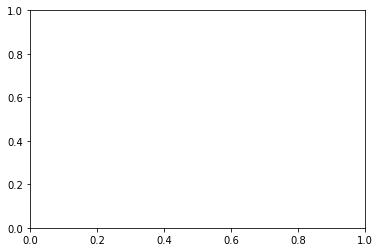

In [ ]:
from matplotlib.pyplot import *

fig, ax = subplots()
#df = pd.DataFrame({'A':26, 'B':20}, index=['N'])
#df.plot(kind='bar', ax=ax)
draw.plot(kind='andrews',ax=ax)
#pd.plotting.andrews_curves(draw,'score0',samples=200)
ax.legend(["AAA", "BBB"]);

In [ ]:
draw

<function matplotlib.pyplot.draw>

In [ ]:
!pip install pandas-profiling

In [ ]:
from pandas_profiling import ProfileReport
import pandas_profiling
profile = ProfileReport(draw)

TypeError: ignored

In [ ]:
test = pd.DataFrame(
    np.random.rand(100, 5),
    columns=["a", "b", "c", "d", "e"]
)

In [ ]:
df_copy.profile_report(style={'full_width':True})
#df.profile_report(style={‘full_width’:True})

AttributeError: ignored

In [ ]:
from pandas_profiling import ProfileReport
#from pandas_profiling.utils.cache import cache_file

profile = ProfileReport(df_copy, explorative=True)

TypeError: ignored